# Get data

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import colors
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras_tuner
import keras
import pandas as pd
from tensorflow.keras import layers
from keras import metrics


In [2]:

tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-08 18:00:48.856832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 18:00:48.862785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 18:00:48.863005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

True

In [3]:


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])





/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_2.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_3.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_2.mat
(539820, 3)
[-0.029808, 0.125662, 5]


In [6]:
from sklearn import preprocessing

data_nm = np.copy(data)[:,:2]
data_nm.shape
nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
# nm_c2 = data_nm.T[1].T
df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

label_arr=[]

for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

data_nm = df_data_nm.assign(label=label_arr)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [111]:
data_nm

,channel1,channel2,label
0,0.000078,0.000500,0
1,0.000739,0.000374,0
2,0.000833,0.000185,0
3,0.000739,0.000437,0
4,0.000928,0.000248,0
...,...,...,...
539815,0.000928,0.000563,5
539816,-0.000205,0.000879,5
539817,-0.000110,0.000311,5
539818,0.000173,0.000185,5


In [8]:
sample = 200
rate = sample * 6
print(rate)

1200


In [9]:
def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)

(3, 1200)
(6, 3, 200)


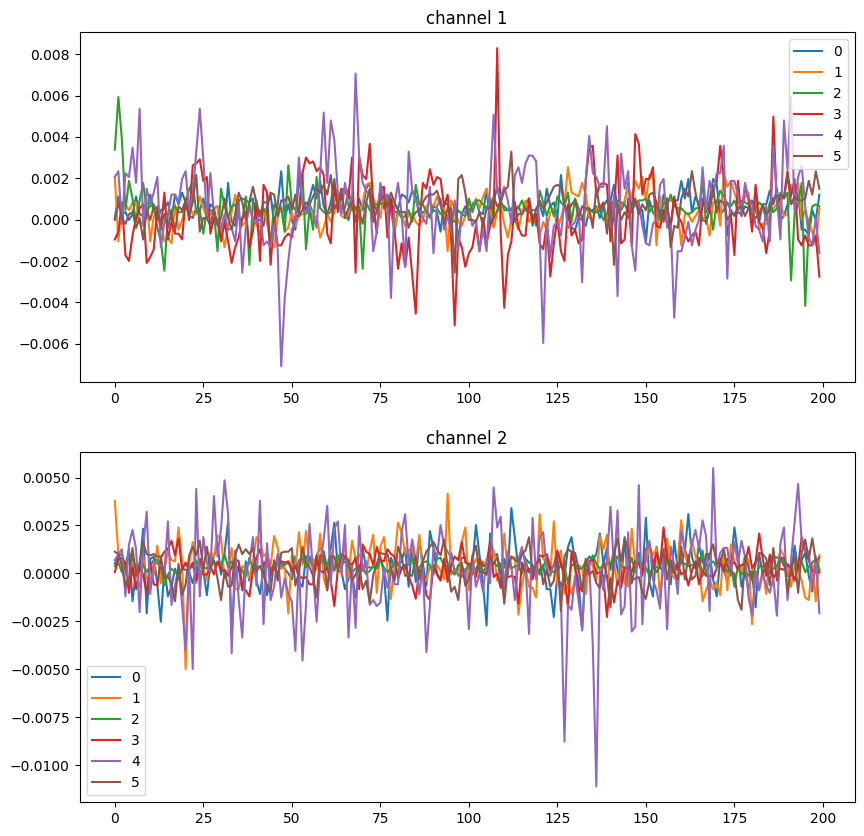

In [10]:
w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()

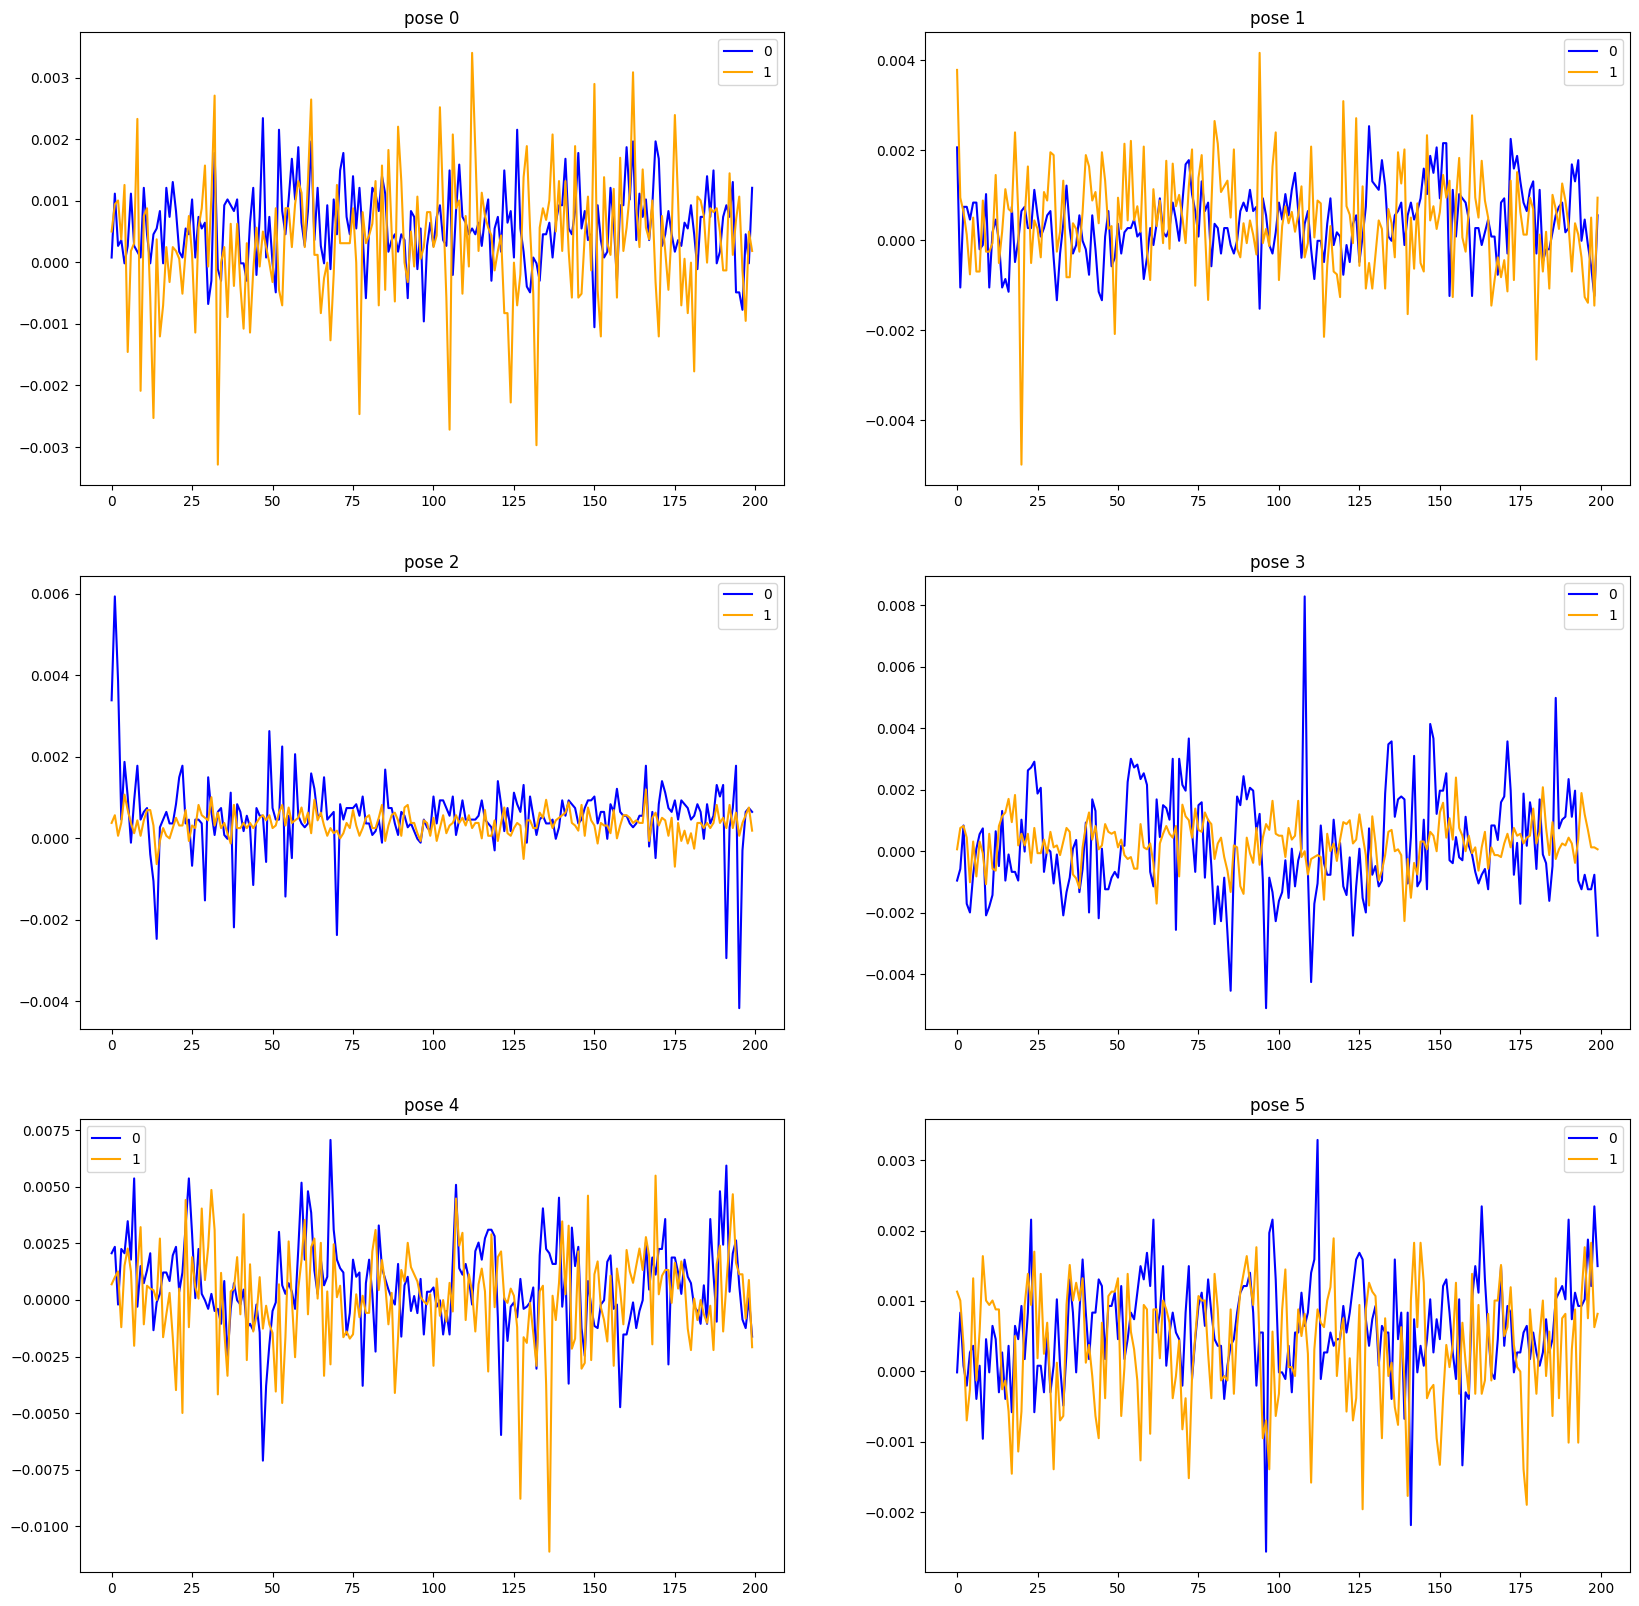

In [11]:
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()

In [244]:
import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple

df = data_nm
# df = pd.DataFrame(data.copy(),columns = ['channel1','channel2','label'])


mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]
img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

# n=392
# n=800
# n=961
# n=2888
dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
# print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
# X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
# X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)
w = img_w_h_len
h = img_w_h_len
X_test = reshape_for_conv2d(X_test,w,h)
X = reshape_for_conv2d(X,w,h)

# X_tl = signal_to_3channelimg(X_tl)
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)


X shape: (270, 1600)


In [15]:
X.shape

(551, 28, 28, 1)

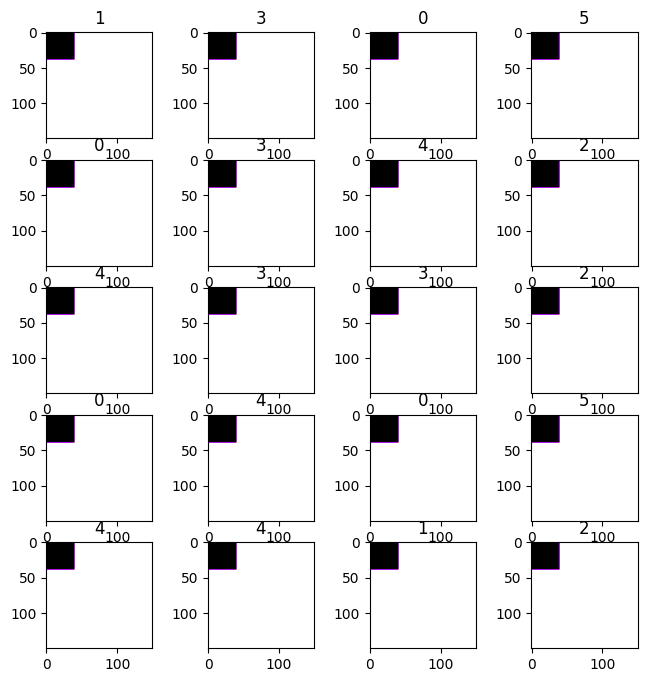

[1 3 0 5 0 3 4 2 4 3 3 2 0 4 0 5 4 4 1 2]


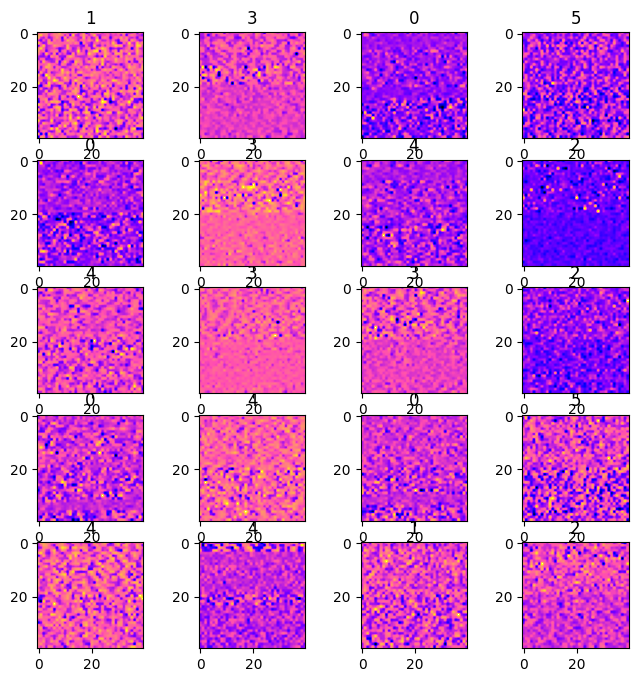

[1 3 0 5 0 3 4 2 4 3 3 2 0 4 0 5 4 4 1 2]


In [184]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    plt.imshow(X_tl[i-1]*255,cmap='gnuplot2')
    # plt.imshow(X_tl[i-1],cmap='gnuplot2')
plt.show()
print(y[:(columns*rows)])

w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    # plt.imshow(X[i-1]*255,cmap='gnuplot2')
    plt.imshow(X[i-1],cmap='gnuplot2')
    # plt.imshow(X[i-1]*255)

plt.show()
print(y[:(columns*rows)])

In [17]:
dataset_train

,channel1,channel2,label
1,0.000739,0.000374,0
3,0.000739,0.000437,0
6,0.000739,0.000122,0
7,0.000078,0.000185,0
8,0.000173,0.000627,0
...,...,...,...
539810,0.000928,0.001068,5
539811,0.000833,0.001510,5
539812,0.000078,0.000311,5
539813,-0.000110,-0.000762,5


In [18]:
X.shape

(551, 28, 28, 1)

# NN
## training & evaluate

In [19]:


# # inputs = keras.Input(shape=(392*2,1))
# input_dim = int(math.sqrt(n*2))
# inputs = keras.Input(shape=(input_dim,input_dim))
# input_shape=[5,5,2048]

# x = layers.Rescaling(2)(inputs)
# x = layers.Flatten()(x)
# # Apply some convolution and pooling layers
# # x = layers.Flatten()(inputs)

# x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(x)

# # x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

# x = layers.Dense(128, activation="relu")(x)
# x = layers.Dense(128, activation="relu")(x)
# num_classes = 6
# outputs = layers.Dense(num_classes, activation="softmax")(x)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.summary()

In [20]:
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts

In [21]:
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)

train_size = 6
w = 10
h = 10
train_images = np.arange(600).reshape(train_size, h, w, 1)
train_images.shape

(6, 10, 10, 1)

In [22]:
# def reshape_for_conv2d(t,w,h):
#     train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
#     reshaped_tuple = t.reshape(train_size, w,h, 1)
#     return reshaped_tuple

In [23]:
# w = 28
# h = 28
# X_test = reshape_for_conv2d(X_test,w,h)
# X = reshape_for_conv2d(X,w,h)

In [24]:
# print(X_test.shape)
# print(len(X_test) * len(X_test[0])* len(X_test[0][0]))
# print(275* 28* 28)
# print()

In [25]:
data_nm

,channel1,channel2,label
0,0.000078,0.000500,0
1,0.000739,0.000374,0
2,0.000833,0.000185,0
3,0.000739,0.000437,0
4,0.000928,0.000248,0
...,...,...,...
539815,0.000928,0.000563,5
539816,-0.000205,0.000879,5
539817,-0.000110,0.000311,5
539818,0.000173,0.000185,5


In [26]:
print(len(X) * len(X[0])* len(X[0][0]))
print(550* 28* 28)

431984
431200


In [27]:
inputs = keras.Input(shape=(28, 28, 3))
# input_shape=[5,5,2048]
input_shape=[28,28,3]

# x = layers.Dense(2048, activation="relu")(x)
# x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(inputs)
x = layers.Conv2D(150, (3,3), activation='relu', input_shape=input_shape[1:])(inputs)

# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = layers.Conv1D( 100, 2, activation='relu',input_shape=input_shape[1:])(x)

# x = layers.Conv2D(200, 3, activation='relu', input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

x = layers.Dense(100, activation="relu")(x)
x = layers.Conv1D( 9, 2, activation='relu',input_shape=input_shape[1:])(x)
# x = layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = keras.layers.GlobalAveragePooling2D()(x)
# x = layers.Conv1D( 9, 2, activation='relu',input_shape=input_shape[1:])(x)

num_classes = 6

outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 150)       4200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 150)       0         
 D)                                                              
                                                                 
 conv1d (Conv1D)             (None, 25, 24, 100)       30100     
                                                                 
 dense (Dense)               (None, 25, 24, 100)       10100     
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 23, 9)         1809      
                                                             

2023-11-08 18:01:17.175248: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 18:01:17.175666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 18:01:17.175959: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [28]:
inputs = keras.Input(shape=(28, 28, 1))
# input_shape=[5,5,2048]
input_shape=[28,28,1]

# x = layers.Dense(2048, activation="relu")(x)
# x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(inputs)
x = layers.Conv2D(150, (3,3), activation='relu', input_shape=input_shape[1:])(inputs)

# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = layers.Conv1D( 100, 2, activation='relu',input_shape=input_shape[1:])(x)

# x = layers.Conv2D(200, 3, activation='relu', input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

x = layers.Dense(100, activation="relu")(x)
x = layers.Conv1D( 9, 2, activation='relu',input_shape=input_shape[1:])(x)
# x = layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = keras.layers.GlobalAveragePooling2D()(x)
# x = layers.Conv1D( 9, 2, activation='relu',input_shape=input_shape[1:])(x)

num_classes = 6

outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 150)       1500      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 150)       0         
 g2D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 25, 24, 100)       30100     
                                                                 
 dense_4 (Dense)             (None, 25, 24, 100)       10100     
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 23, 9)         1809      
                                                           

In [200]:
# inputs = keras.Input(shape=(392*2,1))
# input_dim = int(math.sqrt(n*2))
inputs = keras.Input(shape=(img_w_h_len, img_w_h_len, 1))
# inputs = keras.Input(shape=(input_dim,input_dim))

x = layers.Rescaling(2)(inputs)
x = layers.Flatten()(x)
# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
num_classes = 6
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), loss="sparse_categorical_crossentropy")


Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_42 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_122 (Dense)           (None, 128)               204928    
                                                                 
 dense_123 (Dense)           (None, 128)               16512     
                                                                 
 dense_124 (Dense)           (None, 6)                 774       
                                                                 
Total params: 222214 (868.02 KB)
Trainable params: 222214 

2023-11-08 18:01:18.269575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


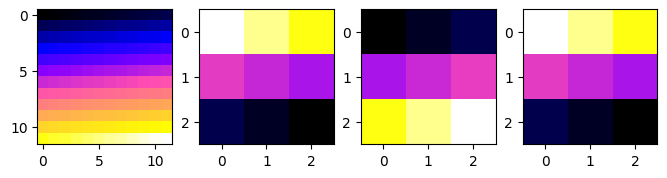

In [30]:
no_element = 144 # 12 * 12
tmp_img =np.arange(no_element)
n_len =int(math.sqrt(no_element))
tmp_img = preprocessing.normalize([tmp_img]).flatten()+2
tmp_img = tmp_img.reshape(n_len,n_len,1)
no=[]
no.append(tmp_img)
tmp_img = np.array(no)
tmp_img.shape
kw = 5
kh = 5
y = tf.keras.layers.Conv2D(3, (kw,kh),
                           # activation='softsign',
                        #    activation='relu',
                           activation='sigmoid',
                           dilation_rate=2,
                           # padding='same',
                           # input_shape=tmp_img.shape)(tmp_img)
                           input_shape=tmp_img.shape[1:])(tmp_img)
y = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(y)
# x = tf.random.normal()
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1,4,1)
plt.imshow(tmp_img[0],cmap='gnuplot2')
fig.add_subplot(1,4,2)
plt.imshow(y[0][:,:,0],cmap='gnuplot2')
fig.add_subplot(1,4,3)
plt.imshow(y[0][:,:,1],cmap='gnuplot2')
fig.add_subplot(1,4,4)
plt.imshow(y[0][:,:,2],cmap='gnuplot2')

plt.show()

In [172]:
# TEST TEMPT DO NOT GET CONFUSED

inputs = keras.Input(shape=(w, h, 1))
# inputs = keras.Input(shape=(28, 28, 3))
# input_shape=[5,5,2048]
# input_shape=[28,28,3]
input_shape=[w,h,1]

# x = layers.Dense(2048, activation="relu")(x)
# x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(inputs)
x = layers.Rescaling(scale=2)(x)

x = layers.Conv2D(64, (5,5), activation='relu',use_bias=True, input_shape=input_shape[1:])(inputs)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)

x = keras.layers.Dropout(0.2)(x,training=True)  

x = layers.Conv2D(32, (5,1), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(7, 7), strides=(2, 2), padding='valid')(x)

x = layers.Softmax()(x)

x = layers.Dense(90, activation="relu")(x)
# x = layers.Dense(90, activation="sigmoid")(x)
x = layers.Dense(90, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(7, 7), strides=(4, 2), padding='valid')(x)
x = layers.Dense(30, activation="relu")(x)


x = keras.layers.GlobalAveragePooling2D()(x)
num_classes = 6


outputs = keras.layers.Dense(num_classes,activation="softmax")(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()


model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), loss="sparse_categorical_crossentropy")




Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 36, 36, 64)        1664      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 34, 34, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 34, 34, 64)        0         
                                                                 
 conv2d_63 (Conv2D)          (None, 30, 34, 32)        10272     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 12, 14, 32)        0         
 ng2D)                                                    

In [250]:
# TEST TEMPT DO NOT GET CONFUSED

inputs = keras.Input(shape=(w, h, 1))
input_shape=[w,h,1]

x = layers.Rescaling(scale=2)(inputs)

x = layers.Conv2D(64, (3,3), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(5, 5), strides=(1, 1), padding='valid')(x)

x = keras.layers.Dropout(0.2)(x,training=True)  

x = layers.Conv2D(32, (5,1), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

x = layers.Softmax()(x)

x = layers.Dense(20, activation="relu")(x)
x = layers.Dense(18, activation="sigmoid")(x)
x = layers.Dense(15, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(4, 2), padding='valid')(x)


x = keras.layers.GlobalAveragePooling2D()(x)
num_classes = 6

outputs = keras.layers.Dense(num_classes,activation="softmax")(x)  # Regularize with dropout

model = keras.Model(inputs, outputs)

model.summary()


# model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
#             loss="sparse_categorical_crossentropy")
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
            loss="sparse_categorical_crossentropy",
          metrics=['accuracy'])



Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_60 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_112 (Conv2D)         (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_138 (MaxPool  (None, 34, 34, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_51 (Dropout)        (None, 34, 34, 64)        0         
                                                                 
 conv2d_113 (Conv2D)         (None, 30, 34, 32)        10272     
                                                          

In [249]:
batch_size = 100
# epochs = 5
epochs = 3000
history = model.fit(X, y,batch_size=batch_size, epochs=epochs)

print(history.params)
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

evaluate = model.evaluate(X_test,y_test)


Epoch 1/3000


ValueError: in user code:

    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1131, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1225, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/metrics/confusion_metrics.py", line 1486, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 672, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 6) and (None, 1) are incompatible


In [241]:
# model.save("./models/model_0.2l_1c.keras")
# model.save("./models/model_0.5_40l_1c_new.keras")

[0 5 0 0 2 2 1 2 3 5 4 3 4 4 5 5 4 3 5 0 0 1 2 0 4 5 0 4 2 4]
5/5 [==============================] - 0s 6ms/step


X,y shape:  (270, 40, 40, 1) / (270,) 
X,y test shape:  (134, 40, 40, 1) / (134,)
[0 5 1 1 2 3 0 2 3 5 4 3 4 4 5 5 4 3 5 0 0 1 2 0 4 5 0 4 2 4] 


5/5 [==============================] - 0s 8ms/step - loss: 0.5712 - accuracy: 0.9104


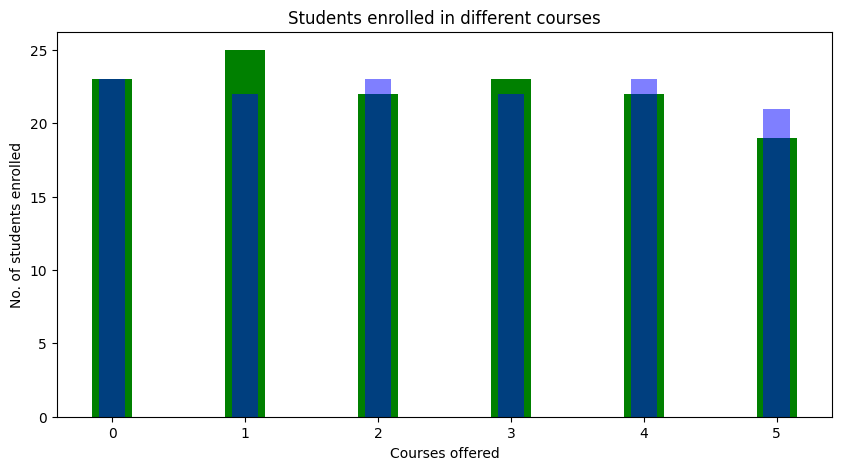

5/5 [==============================] - 0s 8ms/step - loss: 0.6069 - accuracy: 0.9030


[0.60691237449646, 0.9029850959777832]

In [245]:
print(y_test[:30])
pred_label = []

preds = model.predict(X_test)

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print('X,y shape: ',X.shape,'/',y.shape,"\nX,y test shape: ",X_test.shape,"/", y_test.shape)
print(pred_label[:30],"\n\n")


evaluate = model.evaluate(X_test,y_test)


unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

score = model.evaluate(X_test,y_test,verbose = 0)
score = model.evaluate(X_test,y_test)

# print(' acc:', score[0]) 
# print(' loss:', score[1])
# print(' diverse:', score[2])
# print(' auc:', score[3])
score

In [211]:
history.history['accuracy']

KeyError: 'accuracy'

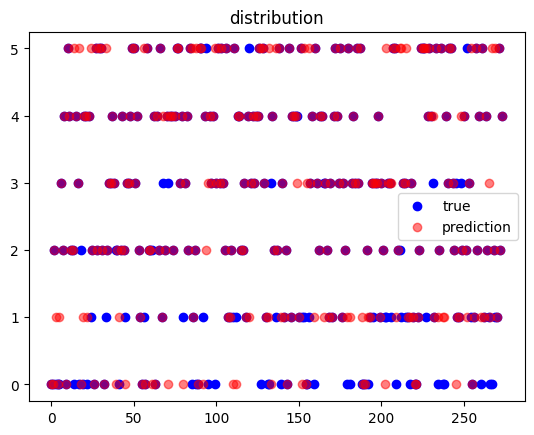

In [110]:

def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(range(len(y_test)), y_test, color='blue',label="true")
    plt.scatter(range(len(y_pred)), y_pred, color='red',alpha=0.5,label="prediction")
    plt.title(regressorName)

    plt.legend(ncol=1)
    plt.show()
    return



plotGraph(y_test, pred_label, "distribution")

In [117]:
6*30*500

90000

In [119]:
math.sqrt(1000)
31*31


961

In [120]:
df = data_nm
df = reshape_data(961,df)
df.shape

(561, 1923)

### load a model

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 rescaling_13 (Rescaling)    (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 25, 25, 64)        0         
 ng2D)                                                           
                                                                 
 conv1d_18 (Conv1D)          (None, 25, 24, 100)       12900     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 24, 23, 100)       0         
 ng2D)                                                    

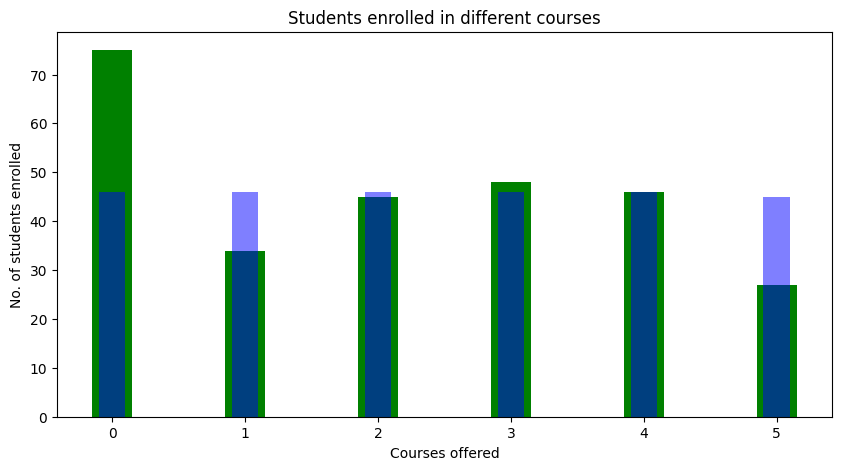

9/9 [==============================] - 0s 7ms/step - loss: 0.5016


In [ ]:
new_model = tf.keras.models.load_model('./models/model_0.4l_1c.keras')

# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()
evaluate = new_model.evaluate(X_test,y_test)


## tuning with tuner

In [ ]:
def build_model(hp):
    input_dim = int(math.sqrt(n*2))
    inputs = keras.Input(shape=(input_dim,input_dim))

    x = layers.Rescaling(2)(inputs)
    x = layers.Flatten()(x)
    # Apply some convolution and pooling layers
    # x = layers.Flatten()(inputs)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
    num_classes = 6
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


: 

In [ ]:

tuner = keras_tuner.tuners.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    executions_per_trial=2,
    directory='my_dir')


: 

In [ ]:
tuner.search(X,y,epochs= 10, validation_data=(X_val,y_val))

: 

In [ ]:
models = tuner.get_best_models(num_models=2)

: 

In [ ]:
tuner.results_summary()

: 

In [ ]:
history = model.fit(X, y,batch_size=batch_size, epochs=epochs)


: 

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

: 

In [ ]:
# model.save("./models/model_tuner.keras")

: 

In [ ]:
evaluate = model.evaluate(X_test,y_test)

: 

## Transfer Learning
- RESNET50

OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)

In [ ]:
print(X[0].shape)
rgb_batch_ts =  np.repeat(X[0][..., np.newaxis], 3, -1)
rgb_batch_ts.shape

: 

In [ ]:
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts

: 

In [ ]:
X_tl = signal_to_3channelimg(X_tl)
X_val_tl = signal_to_3channelimg(X_val_tl)
X_test_tl = signal_to_3channelimg(X_test_tl)

: 

In [ ]:
#create basemodel and get it pre-trained para
base_model = keras.applications.ResNet50(
    weights="imagenet",
    input_shape=(150,150,3),
    include_top=False
    )
base_model.trainable = False    
base_model.summary()

: 

In [ ]:
1024/2

: 

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))


# x = layers.Rescaling(2)(inputs)
# x = layers.Flatten()(x)
x = base_model(inputs, training=False)

# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(2048, activation="relu")(x)
# x = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
# x = layers.Flatten()(x)
# x = layers.Convolution1D(x,kernel_size=2)
# x = layers.Convolution1D(x)
# input_shape=[5,5,2048]
# x = layers.Conv2D(500, 3, activation='relu', input_shape=input_shape[1:])(x)
x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(x)

# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)
x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)

# x = layers.Conv2D(200, 3, activation='relu', input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

x = layers.Dense(128, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

: 

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))


# x = layers.Rescaling(2)(inputs)
# x = layers.Flatten()(x)
x = base_model(inputs, training=False)

# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

# outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

: 

In [ ]:
X_tl.shape


: 

In [ ]:
y.shape

: 

In [ ]:
# model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.sparse_categorical_crossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy()],
# )
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
batch_size = 64
epochs = 1000
# history_tl = model.fit((X_tl,y), epochs=epochs, validation_data=(X_val_tl,y_val))
history_tl = model.fit(X_tl, y,batch_size=batch_size, epochs=epochs)


: 

In [ ]:

# summarize history for loss
plt.plot(history_tl.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

: 

In [ ]:
model.evaluate(X_test_tl,y_test)

: 

# ALGO
## Random Forest

In [ ]:
import math
import urllib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_decision_forests as tfdf


: 

In [ ]:
dataset_train

: 

In [ ]:
print(dataset_test_ar[0][-1])
column_name =np.array(list(range(n*2+1)))
column_name=column_name+1
column_name=column_name.astype('str')
column_name
us = pd.DataFrame(dataset_test_ar,columns=column_name)

: 

In [ ]:
us

: 

In [ ]:
# # Train a Gradient Boosted Trees model.
# model = tfdf.keras.GradientBoostedTreesModel(num_trees=1500)
lbel_index = n*n
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(us,label=str(n*2+1))

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)


: 

In [ ]:
model_1.summary()

: 

# Bluetooth <placeholder>

In [ ]:
import bluetooth

nearby_devices = bluetooth.discover_devices(lookup_names=True)
print("Found {} devices.".format(len(nearby_devices)))

for addr, name in nearby_devices:
    print("  {} - {}".format(addr, name))

: 